<a href="https://colab.research.google.com/github/souhirbenamor/EPF/blob/main/SARIMA_roman_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 4.2 MB/s 
     |████████████████████████████████| 9.9 MB 26.4 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd
from itertools import product
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
data = pd.read_excel('/content/German_data.xlsx')
print(data)

                         Date  Day-ahead Price [EUR/MWh] 
0     2014-12-31 23:59:59.991                   25.390297
1     2015-01-01 00:59:59.991                   24.980000
2     2015-01-01 01:59:59.991                   24.796874
3     2015-01-01 02:59:59.991                   26.074430
4     2015-01-01 03:59:59.991                   20.377994
...                       ...                         ...
52603 2018-12-29 23:59:59.983                   56.545811
52604 2018-12-30 00:59:59.983                   50.781170
52605 2018-12-30 01:59:59.983                   50.781170
52606 2018-12-30 02:59:59.983                   50.781170
52607 2018-12-30 03:59:59.983                   48.019167

[52608 rows x 2 columns]


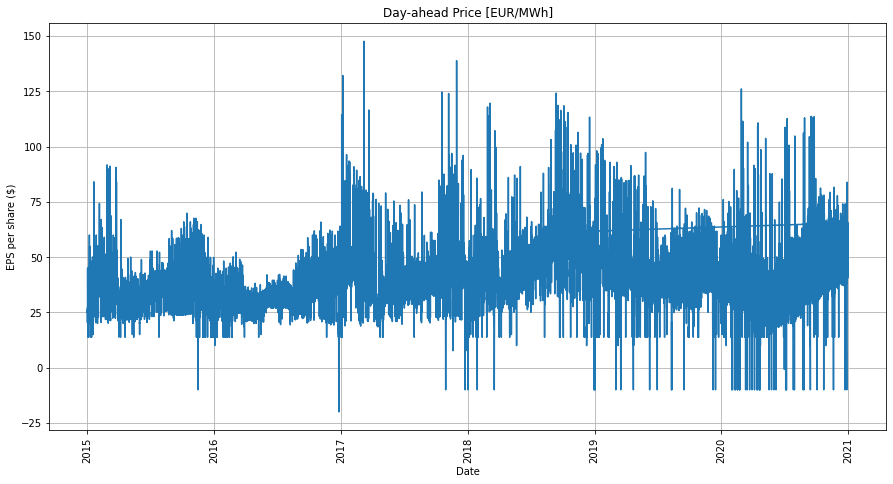

In [ ]:
plt.figure(figsize=[15, 7.5]); # Set dimensions for figure
plt.plot(data['Date'], data['Day-ahead Price [EUR/MWh] '])
plt.title('Day-ahead Price [EUR/MWh]')
plt.ylabel('EPS per share ($)')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

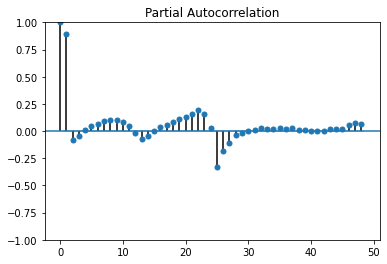

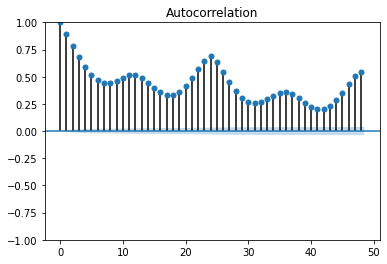

In [ ]:
plot_pacf(data['Day-ahead Price [EUR/MWh] ']);
plot_acf(data['Day-ahead Price [EUR/MWh] ']);

In [ ]:
ad_fuller_result = adfuller(data['Day-ahead Price [EUR/MWh] '])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -15.77835812573977
p-value: 1.1390072384561862e-28


In [ ]:
def optimize_SARIMA(parameters_list, d, D, s, exog):
    """
        Return dataframe with parameters, corresponding AIC and SSE
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order
        D - seasonal integration order
        s - length of season
        exog - the exogenous variable
    """
    
    results = []
    
    for param in tqdm_notebook(parameters_list):
        try: 
            model = SARIMAX(exog, order=(param[0], d, param[1]), seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue
            
        aic = model.aic
        results.append([param, aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)x(P,Q)', 'AIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [ ]:
p = range(0, 4, 1)
d = 1
q = range(0, 4, 1)
P = range(0, 4, 1)
D = 1
Q = range(0, 4, 1)
s = 24
parameters = product(p, q, P, Q)
parameters_list = list(parameters)
print(len(parameters_list))

256


In [ ]:
result_df = optimize_SARIMA(parameters_list, 1, 1, 4, data['Day-ahead Price [EUR/MWh] '])
result_df

  0%|          | 0/256 [00:00<?, ?it/s]

In [ ]:
best_model = SARIMAX(data['Day-ahead Price [EUR/MWh] '], order=(0, 1, 2), seasonal_order=(0, 1, 2, 4)).fit(dis=-1)
print(best_model.summary())